___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>


# Keras RNN for a Car Mileage (USA) Time Series (Seasonal) Forecast:

**<center>By Drew Sims</center>**

<center>This project source code is based off a project Exercise given by Pierian Data in the Python Time-Series Data Science Bootcamp.</center>

The data was downloaded from: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

        - The data is based on the number of miles driven within the                                       
          United States each year
        - The data is collected in a monthly interval
        
**The goal of this project is to forecast how many miles will be driven within the United States over the course of the next 2 years using a RNN.**

**The steps of this process include**

**1.)** Import Libraries 

**2.)** Import CSV Data

**3.)** Visualize/Explore Data

**4.)** Train Test Split

**5.)** Scale Data

**6.)** Time Series Generator

**7.)** Create RNN Model

**8.)** Plot and Visualize Model Performance

**9.)** Evaluate Model on Test Data

**10.)** Inverse Transform Data

**11.)** Visualize and Compare Predictions vs Test Set

**12.)** Observations

**13.)** Save Model

# 1.) Import Libraries

In [1]:
# Imported Libraries
# Additional libraries will be imported as the project needs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2.) Import Data

In [2]:
# Imported csv stored into a dataframe

df = pd.read_csv('C:\\Users\\Drew\\Time_Series_Analysis_Jose_Portilla\\UDEMY_TSA_FINAL\\Data\\Miles_Traveled.csv',index_col ='DATE',parse_dates=True)

In [3]:
# The data is indexed in datetime on a monthly interval

df.index.freq = 'MS'

The start of the dataframe begins from January 1st, 1970

In [4]:
# Visualize dataframe

df.head(5)

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


The end of the dataset ends on December 1st, 2018

In [5]:
df.tail(5)

,TRFVOLUSM227NFWA
DATE,
2018-08-01,286608.0
2018-09-01,260595.0
2018-10-01,282174.0
2018-11-01,258590.0
2018-12-01,268413.0


In [6]:
# Reset Mileage Column Name from strange name to 'Value'

df.columns = ['Value']

# 3.) Visualize/Explore Data

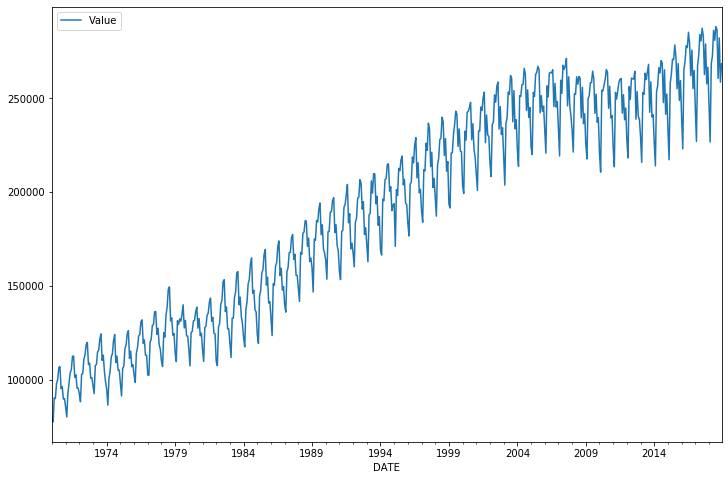

In [7]:
# Visualize the time series data

df.plot(figsize=(12,8))

**Seasonal Decomposition to explore the ETS Components (for seasonality and trends)**

In [8]:
# Import seasonal decompisition from statsmodel library

from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
# Create a seasonal_decompose instance to plot an ets decomposition from

results = seasonal_decompose(df['Value'])

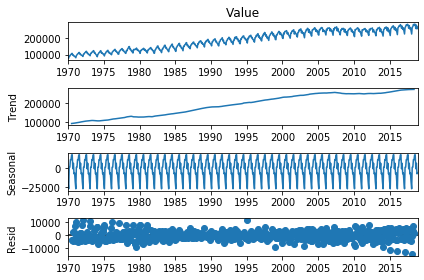

In [10]:
# Visualze the ETS Decomposition

results.plot();

**Observed Plot**

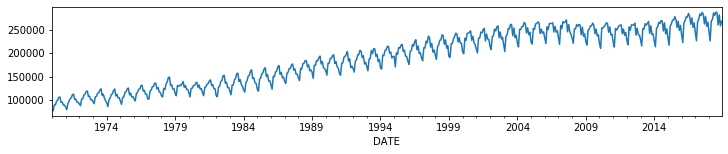

In [11]:
results.observed.plot(figsize=(12,2))

**Trend Plot:** There appears to be a consistent upwards trend through the mean of the dataset

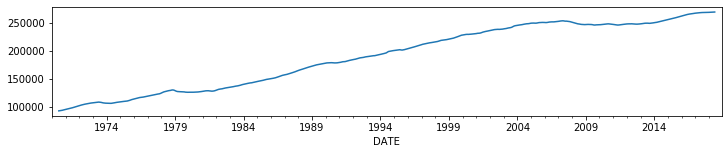

In [12]:
results.trend.plot(figsize=(12,2))

**Seasonal Plot:** This plot indicates that there is a yearly seasonality to the dataset. This will be helpful in determining what interval we will want to forecast within the RNN

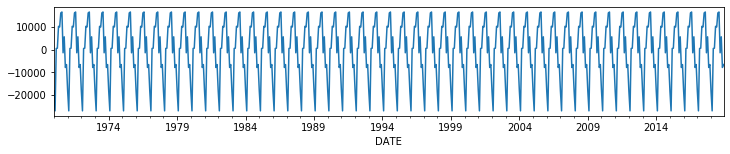

In [13]:
results.seasonal.plot(figsize=(12,2))

**Residual Plot:** Residuals seem to increase (more noisy) at the start of the dataset as well as the end of the dataset. The seasonal and trend portion of the components do not explain these high residuals in these areas, so there must be an outside factor affecting these portions of the data (start,end).

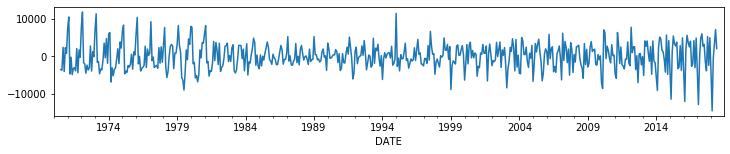

In [14]:
results.resid.plot(figsize=(12,2))

# 4.) Train Test Split

In [15]:
# Determine the lenght of the dataset to see how much data is available

len(df)

588

In [16]:
# Define the training set length by taking away 1 year from the data

train_len = len(df) - 12

In [17]:
# Make sure the training set is 12 months less than the whole data set

train_len

576

**Split the training and test set up**

In [18]:
train = df.iloc[:train_len]
test = df.iloc[train_len:]

In [19]:
# Check lengths of each set

len(train)
len(test)

12

# 5.) Scale Data

In [20]:
# Import MinMaxScaler from Sklearn

from sklearn.preprocessing import MinMaxScaler

In [21]:
# Create an instance of MinMaxScaler

MinMaxScale = MinMaxScaler()

In [22]:
# only fit to training data to avoid overfitting of known future data
# in a real world scenario, you can only fit to current data
    # finds max value in training data

MinMaxScale.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
# Scale the sets by the max values

scaled_train = MinMaxScale.transform(train)
scaled_test = MinMaxScale.transform(test)

# 6.) Time Series Generator

In [24]:
# Import TimeseriesGenerator from keras library

from keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
# n_input = how many periods you want to look at before the predicted values (in this case it is 2 years or 24 months of data)
# Features = 1 due to there is only one column that we are predicting off of (non-multivariate)

n_input = 24
n_features=1

# Scaled_train for both because it has the data and the labels (x,y)
# Smaller batch sizes work better for time series data
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# 7.) Create the RNN Model

In [26]:
# Import necessary libraries from keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [27]:
# Create a empty sequential model
# Build model with input layer and dense layer
# Compile model

model = Sequential()
#input shape is a tuple
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
# outputs the predicted value
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [28]:
# Check parameters of model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Fit the model (train model) and chose epoch iterations value

model.fit_generator(generator,epochs=30)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
552/552 [==============================] - 8s 14ms/step - loss: 0.0132
Epoch 2/30
552/552 [==============================] - 7s 12ms/step - loss: 0.0065
Epoch 3/30
552/552 [==============================] - 7s 14ms/step - loss: 0.0064
Epoch 4/30
552/552 [==============================] - 7s 12ms/step - loss: 0.0056
Epoch 5/30
552/552 [==============================] - 7s 13ms/step - loss: 0.0051
Epoch 6/30
552/552 [==============================] - 8s 14ms/step - loss: 0.0038
Epoch 7/30
552/552 [==============================] - 8s 15ms/step - loss: 0.0023
Epoch 8/30
552/552 [==============================] - 8s 14ms/step - loss: 0.0023
Epoch 9/30
552/552 [==============================] - 8s 15ms/step - loss: 0.0017
Epoch 10/30
552/552 [==============================] - 8s 14ms/step - loss: 0.0017
Epoch 11/30
552/552 [==============================] - 6s 10ms/step - loss: 0.0017
Epoch 12/30
552/552 

# 8.) Plot and Visualize Model Performance

In [30]:
# Locates what column the dictionary of losses from the model training is stored in

model.history.history.keys()

dict_keys(['loss'])

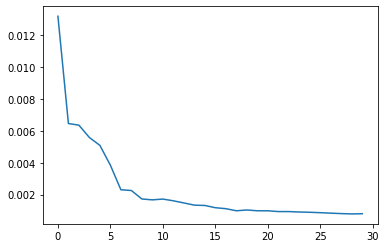

In [31]:
# Plot model performance
# model.history.history['loss'] grabs the dictionary of loss per epoch in the model training

loss_per_epoch = model.history.history['loss']
plt.plot(loss_per_epoch)

# Converges along the minimal loss

# 9.) Evaluate Model on Test Data Set

The three cells below will be used to test if the evaluation batch is being corrected into the correct array format. The process will be overriden in the forloop below in order to use the correct number of n_input's.

In [32]:
# Create an instance in which it contains the last year of data to call predictions off of

first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [33]:
# Reformat the shape of the evaluation batch to fit into the model (has three brackets around data set array)

first_eval_batch = first_eval_batch.reshape((1, 12, n_features))

In [34]:
# Ensure the first evaluation batch is in the correct format

first_eval_batch

# This will be done and overwritten in the forloop beneath, but we wanted to visualize the array to ensure that it is in the correct format before starting the forloop

array([[[0.79630397],
        [0.71226435],
        [0.90477416],
        [0.93121043],
        [0.98386382],
        [0.96757519],
        [1.        ],
        [0.9801859 ],
        [0.8824684 ],
        [0.95995255],
        [0.85883345],
        [0.90086755]]])

**We need to create an algorithm that predicts into the future by using new predictions to predict off of.**

Uses the evaluation batch to create the first prediction. Then it appends this prediction value to the list of data. However     this will create 13 points and we need 12. So once the prediction is appended onto the list, we need to get rid of the first     data point.

**This process is repeated for however many desired months forecasted into the future**

In [35]:
# We want to now predict the entire test set (forecast into future using RNN)

#Create empty list for values to be stored for forecasting
test_predictions = []

# last n_input points from the training set (24)
first_eval_batch = scaled_train[-n_input:]

# reshape this to the format RNN wnats (same as TimeSeriesGenerator)
# This is the last 24 points that will be used for more predictions
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
# One timestep ahead of historical 12 points
    # the [0] is for formatting
    current_pred = model.predict(current_batch)[0]
    
    # store the prediction
    test_predictions.append(current_pred) 
    
    # UPDATE the current batch to include the prediction and drop the first value within array
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

# 10.) Inverse Transform Data

The data is scaled, so we need to inverse the scaling in order to compare the predictions to the original data

In [36]:
# Create an Inverse Transform Instance

true_predictions = MinMaxScale.inverse_transform(test_predictions)

In [37]:
true_predictions

array([[248103.35338086],
       [236081.91225117],
       [266123.52946597],
       [273481.40500438],
       [283097.05407697],
       [284262.02278304],
       [289917.57896376],
       [285687.98501515],
       [273173.01952797],
       [279659.78647918],
       [263622.76584202],
       [267979.84764022]])

# 11.) Visualize and Compare Predictions vs Test Set

In [38]:
# Make a new column with predicted values stored into the test set data set to compare accuracy

test['Predictions'] = true_predictions

C:\Users\Drew\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
# Ensure the data was appended to the dataframe correctly

test

,Value,Predictions
DATE,,
2018-01-01,245695.0,248103.353381
2018-02-01,226660.0,236081.912251
2018-03-01,268480.0,266123.529466
2018-04-01,272475.0,273481.405004
2018-05-01,286164.0,283097.054077
2018-06-01,280877.0,284262.022783
2018-07-01,288145.0,289917.578964
2018-08-01,286608.0,285687.985015
2018-09-01,260595.0,273173.019528


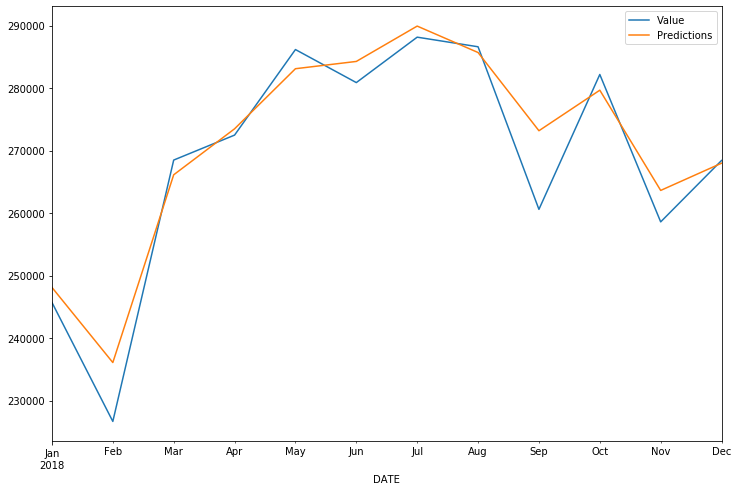

In [40]:
# Visualize Test Data and predictions in order to compare accuracy

# The number of epochs, lstm's, and inputs can be explored in order to try and strenghten the models performance

test.plot(legend=True,figsize=(12,8))

# 12.) Observations

1.) It can be oberserved that there is a downward trend in February.

    - this can be due to people not wanting to drive through the cold months 
      when it is snowing

2.) The majority of driving done is through the Spring and Summer months
    
    - this is due to people being able to drive more when road conditions 
      are best

3.) The peak mileage of people driving occurs during June and July

    - this is most likely due to peak vacation times because of summer 
      break. More road trips are likely to be made during this time.
      
4.) There is another major drop of mileage as August comes

    - this is most likely due to school being back in session, so people 
      are alot less likely to travel during this time

# 13.) Save the RNN Model

In [41]:
model.save('Miles_Model.h5')